In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from pprint import pprint

In [17]:
file = os.path.join("Lawful Permanent Status.csv")
table = pd.read_csv(file, thousands=',')
table = table.replace(',',"", regex=True)
table = table.iloc[1: , 1: ]
table = table.drop([81, 82, 83])
table.fillna(0)
table = table.replace('-',0)
table.tail(15)

table.set_index('Type and class of admission', inplace=True)

for col in table.columns:
    table[col] = table[col].astype(float)


In [18]:
adj_fam_sponsor = table.iloc[33:37, :]
adj_fam_sponsor

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Type and class of admission,,,,,,,,,,
First: Unmarried sons/daughters of U.S. citizens and their children,3343.0,2750.0,2570.0,2335.0,2557.0,2025.0,2027.0,2023.0,3718.0,2252.0
Second: Spouses children and unmarried sons/daughters of alien residents,11985.0,8692.0,6599.0,11889.0,7032.0,6861.0,5984.0,4481.0,8380.0,7507.0
Third: Married sons/daughters of U.S. citizens and their spouses and children,3085.0,2453.0,1843.0,1858.0,2555.0,2112.0,2126.0,1564.0,2363.0,1456.0
Fourth: Brothers/sisters of U.S. citizens (at least 21 years of age) and their spouses and children,9933.0,4665.0,15606.0,7319.0,4931.0,4435.0,3687.0,4670.0,5014.0,2743.0


In [19]:
adj_fam_sponsor.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,7086.500000,4640.00000,6654.500000,5850.250000,4268.750000,3858.250000,3456.000000,3184.500000,4868.750000,3489.500000
std,4550.591866,2873.69669,6323.662046,4722.950023,2155.701955,2291.967332,1848.881283,1618.921966,2578.952161,2730.329467
min,3085.000000,2453.00000,1843.000000,1858.000000,2555.000000,2025.000000,2027.000000,1564.000000,2363.000000,1456.000000
25%,3278.500000,2675.75000,2388.250000,2215.750000,2556.500000,2090.250000,2101.250000,1908.250000,3379.250000,2053.000000
50%,6638.000000,3707.50000,4584.500000,4827.000000,3744.000000,3273.500000,2906.500000,3252.000000,4366.000000,2497.500000
75%,10446.000000,5671.75000,8850.750000,8461.500000,5456.250000,5041.500000,4261.250000,4528.250000,5855.500000,3934.000000
max,11985.000000,8692.00000,15606.000000,11889.000000,7032.000000,6861.000000,5984.000000,4670.000000,8380.000000,7507.000000


In [20]:
new_fam_sponsor = table.iloc[60:64, :]
new_fam_sponsor

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Type and class of admission,,,,,,,,,,
First: Unmarried sons/daughters of U.S. citizens and their children,23956.0,17910.0,21788.0,23351.0,21976.0,20047.0,24192.0,25228.0,20779.0,9131.0
Second: Spouses children and unmarried sons/daughters of alien residents,96633.0,91017.0,92516.0,93752.0,97860.0,114406.0,107516.0,105360.0,85018.0,44194.0
Third: Married sons/daughters of U.S. citizens and their spouses and children,24619.0,19299.0,19451.0,23972.0,21716.0,25280.0,21134.0,17967.0,22850.0,12474.0
Fourth: Brothers/sisters of U.S. citizens (at least 21 years of age) and their spouses and children,61377.0,55233.0,49930.0,64628.0,55283.0,62921.0,65572.0,55270.0,56017.0,41803.0


In [21]:
new_fam_sponsor.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,4.00000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,51646.25000,45864.750000,45921.25000,51425.750000,49208.750000,55663.500000,54603.500000,50956.250000,46166.000000,26900.500000
std,34716.55397,34706.852872,34010.92322,34194.106806,36061.589051,43570.038471,40682.131258,39701.426997,30521.335325,18663.946358
min,23956.00000,17910.000000,19451.00000,23351.000000,21716.000000,20047.000000,21134.000000,17967.000000,20779.000000,9131.000000
25%,24453.25000,18951.750000,21203.75000,23816.750000,21911.000000,23971.750000,23427.500000,23412.750000,22332.250000,11638.250000
50%,42998.00000,37266.000000,35859.00000,44300.000000,38629.500000,44100.500000,44882.000000,40249.000000,39433.500000,27138.500000
75%,70191.00000,64179.000000,60576.50000,71909.000000,65927.250000,75792.250000,76058.000000,67792.500000,63267.250000,42400.750000
max,96633.00000,91017.000000,92516.00000,93752.000000,97860.000000,114406.000000,107516.000000,105360.000000,85018.000000,44194.000000


In [22]:
adj_job_sponsor = table.iloc[38:43, :]
adj_job_sponsor


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Type and class of admission,,,,,,,,,,
First: Priority workers,23605.0,37799.0,37315.0,38830.0,39936.0,40490.0,38527.0,35558.0,37322.0,46104.0
Second: Professionals with advanced degrees or aliens of exceptional ability,65140.0,49414.0,60991.0,46903.0,42563.0,36570.0,36265.0,37005.0,36151.0,41262.0
Third: Skilled workers professionals and unskilled workers,29757.0,31208.0,34991.0,35641.0,29696.0,26926.0,29432.0,28750.0,28333.0,35819.0
Fourth: Certain special immigrants,5306.0,6644.0,5635.0,6972.0,8966.0,8638.0,7666.0,7935.0,7597.0,9343.0
Fifth: Employment creation (investors),576.0,951.0,1276.0,1468.0,990.0,1395.0,1632.0,1700.0,1613.0,1213.0


In [23]:
adj_job_sponsor.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,24876.800000,25203.200000,28041.60000,25962.800000,24430.200000,22803.800000,22704.400000,22189.600000,22203.200000,26748.200000
std,25593.476683,20697.148033,24690.11004,20361.545121,18611.430472,17163.253427,16953.647551,16311.547851,16567.974384,20140.532657
min,576.000000,951.000000,1276.00000,1468.000000,990.000000,1395.000000,1632.000000,1700.000000,1613.000000,1213.000000
25%,5306.000000,6644.000000,5635.00000,6972.000000,8966.000000,8638.000000,7666.000000,7935.000000,7597.000000,9343.000000
50%,23605.000000,31208.000000,34991.00000,35641.000000,29696.000000,26926.000000,29432.000000,28750.000000,28333.000000,35819.000000
75%,29757.000000,37799.000000,37315.00000,38830.000000,39936.000000,36570.000000,36265.000000,35558.000000,36151.000000,41262.000000
max,65140.000000,49414.000000,60991.00000,46903.000000,42563.000000,40490.000000,38527.000000,37005.000000,37322.000000,46104.000000


In [24]:
new_job_sponsor = table.iloc[65:70, :]
new_job_sponsor

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Type and class of admission,,,,,,,,,,
First: Priority workers,1646.0,1517.0,1663.0,1724.0,1752.0,2372.0,2533.0,3956.0,2149.0,1284.0
Second: Professionals with advanced degrees or aliens of exceptional ability,1691.0,1545.0,2035.0,1898.0,1781.0,2288.0,3066.0,3090.0,3355.0,2404.0
Third: Skilled workers professionals and unskilled workers,7459.0,8021.0,8641.0,7515.0,7547.0,9007.0,8651.0,10478.0,13454.0,7399.0
Fourth: Certain special immigrants,1395.0,1222.0,1296.0,1390.0,1618.0,1739.0,1838.0,1776.0,2012.0,1361.0
Fifth: Employment creation (investors),2764.0,5677.0,7267.0,9255.0,9198.0,8468.0,8245.0,7923.0,7472.0,2770.0


In [25]:
new_job_sponsor.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2991.000000,3596.400000,4180.400000,4356.400000,4379.20000,4774.800000,4866.600000,5444.600000,5688.400000,3043.600000
std,2552.488688,3085.283747,3488.690987,3733.156346,3692.31766,3630.597292,3301.345832,3629.610144,4872.725038,2518.967507
min,1395.000000,1222.000000,1296.000000,1390.000000,1618.00000,1739.000000,1838.000000,1776.000000,2012.000000,1284.000000
25%,1646.000000,1517.000000,1663.000000,1724.000000,1752.00000,2288.000000,2533.000000,3090.000000,2149.000000,1361.000000
50%,1691.000000,1545.000000,2035.000000,1898.000000,1781.00000,2372.000000,3066.000000,3956.000000,3355.000000,2404.000000
75%,2764.000000,5677.000000,7267.000000,7515.000000,7547.00000,8468.000000,8245.000000,7923.000000,7472.000000,2770.000000
max,7459.000000,8021.000000,8641.000000,9255.000000,9198.00000,9007.000000,8651.000000,10478.000000,13454.000000,7399.000000


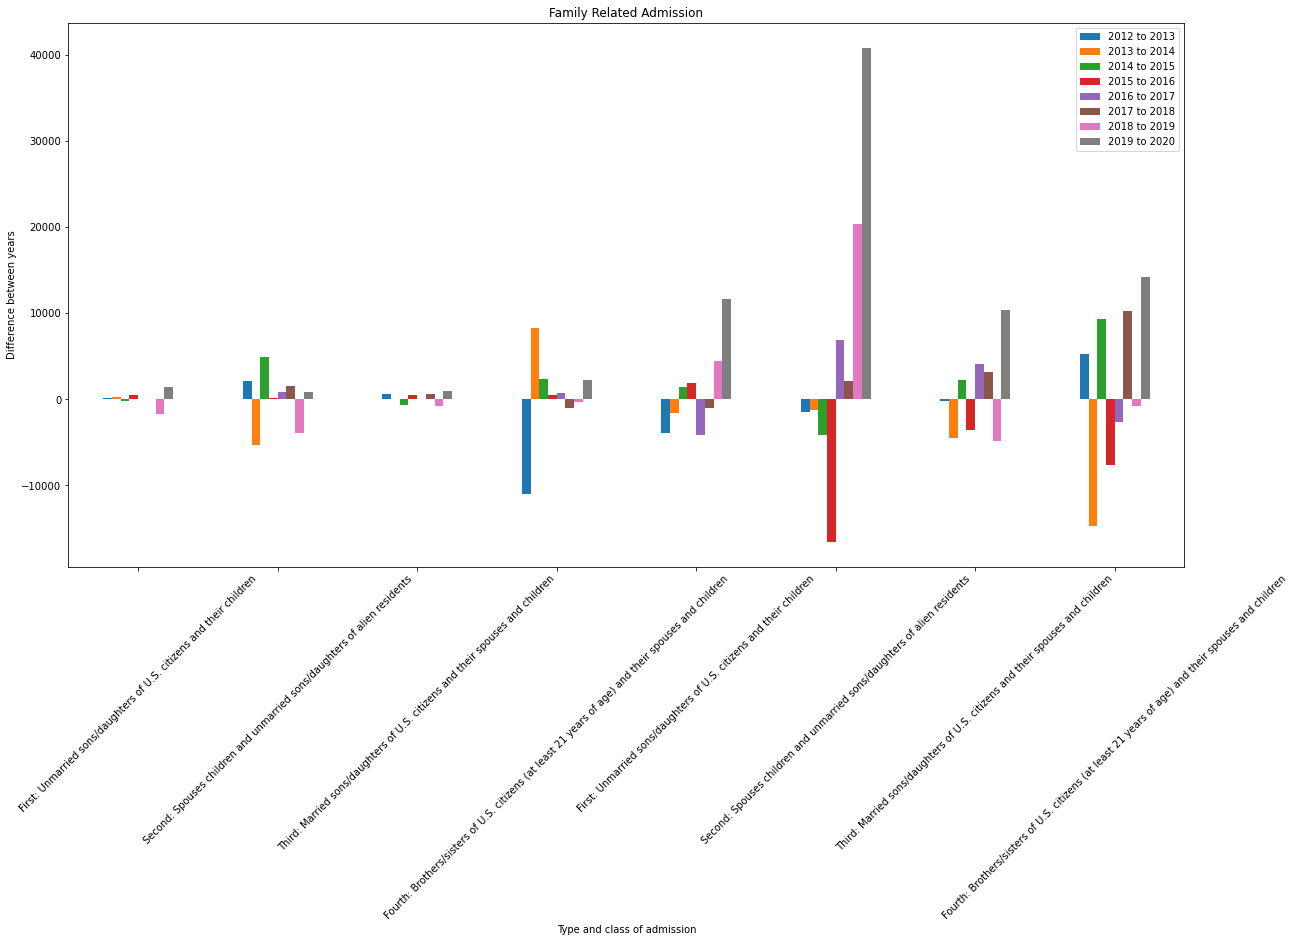

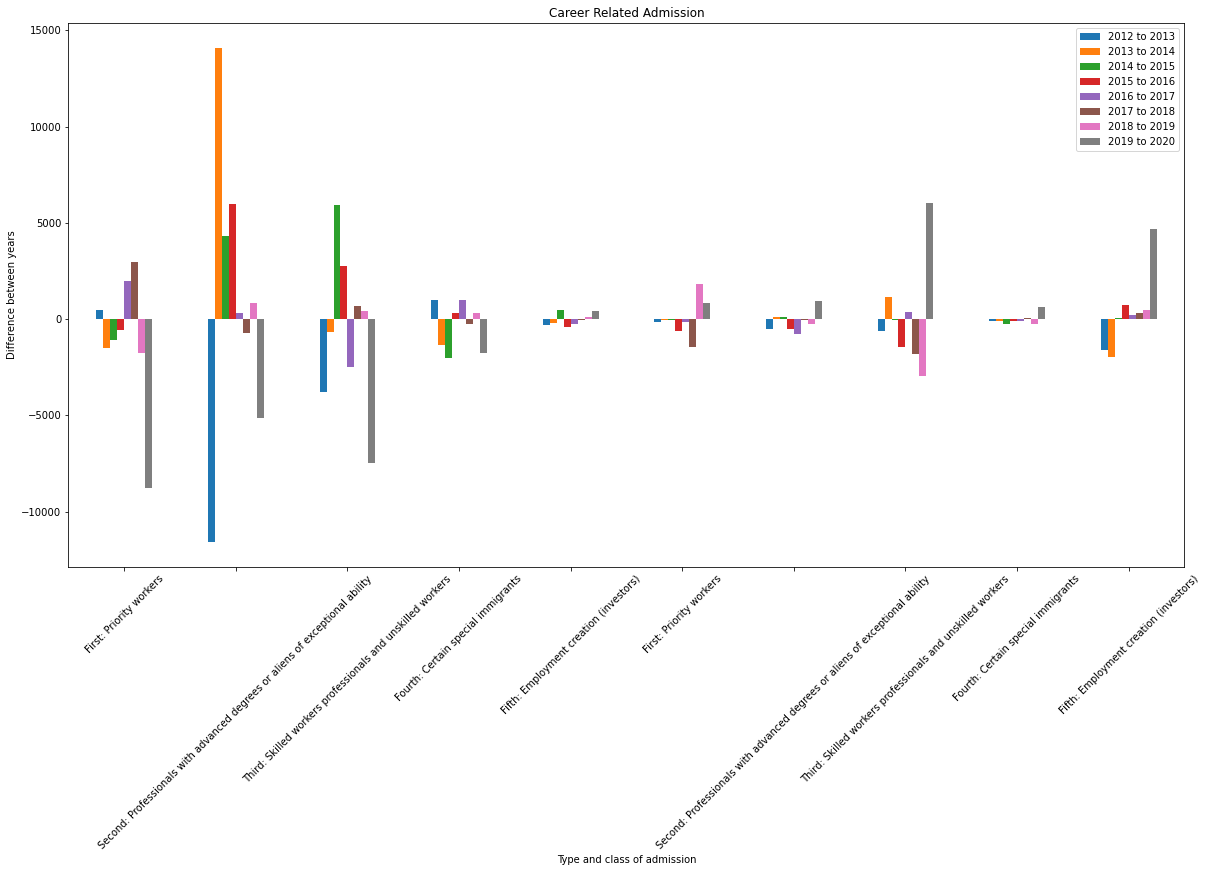

In [26]:
#Fam-related (df1) and career-ralted (df2) addmision data from ADJ and NEW subtypes respectively

diff_df_change = pd.DataFrame()
for start, end in zip(table.columns[1:10], table.columns[2:]):
     diff_df_change[f"{start} to {end}"] = table[start].astype(float).sub(table[end].astype(float), axis = 0)
        
        
df1 = pd.concat([diff_df_change.iloc[33:37, :], diff_df_change.iloc[60:64, :]]);

df1.plot.bar(title="Family Related Admission", ylabel="Difference between years", 
             figsize=(20, 10), rot=45);
               
df2 = pd.concat([diff_df_change.iloc[38:43, :], diff_df_change.iloc[65:70, :]]);

df2.plot.bar(title="Career Related Admission", ylabel="Difference between years", 
             figsize=(20, 10), rot=45);

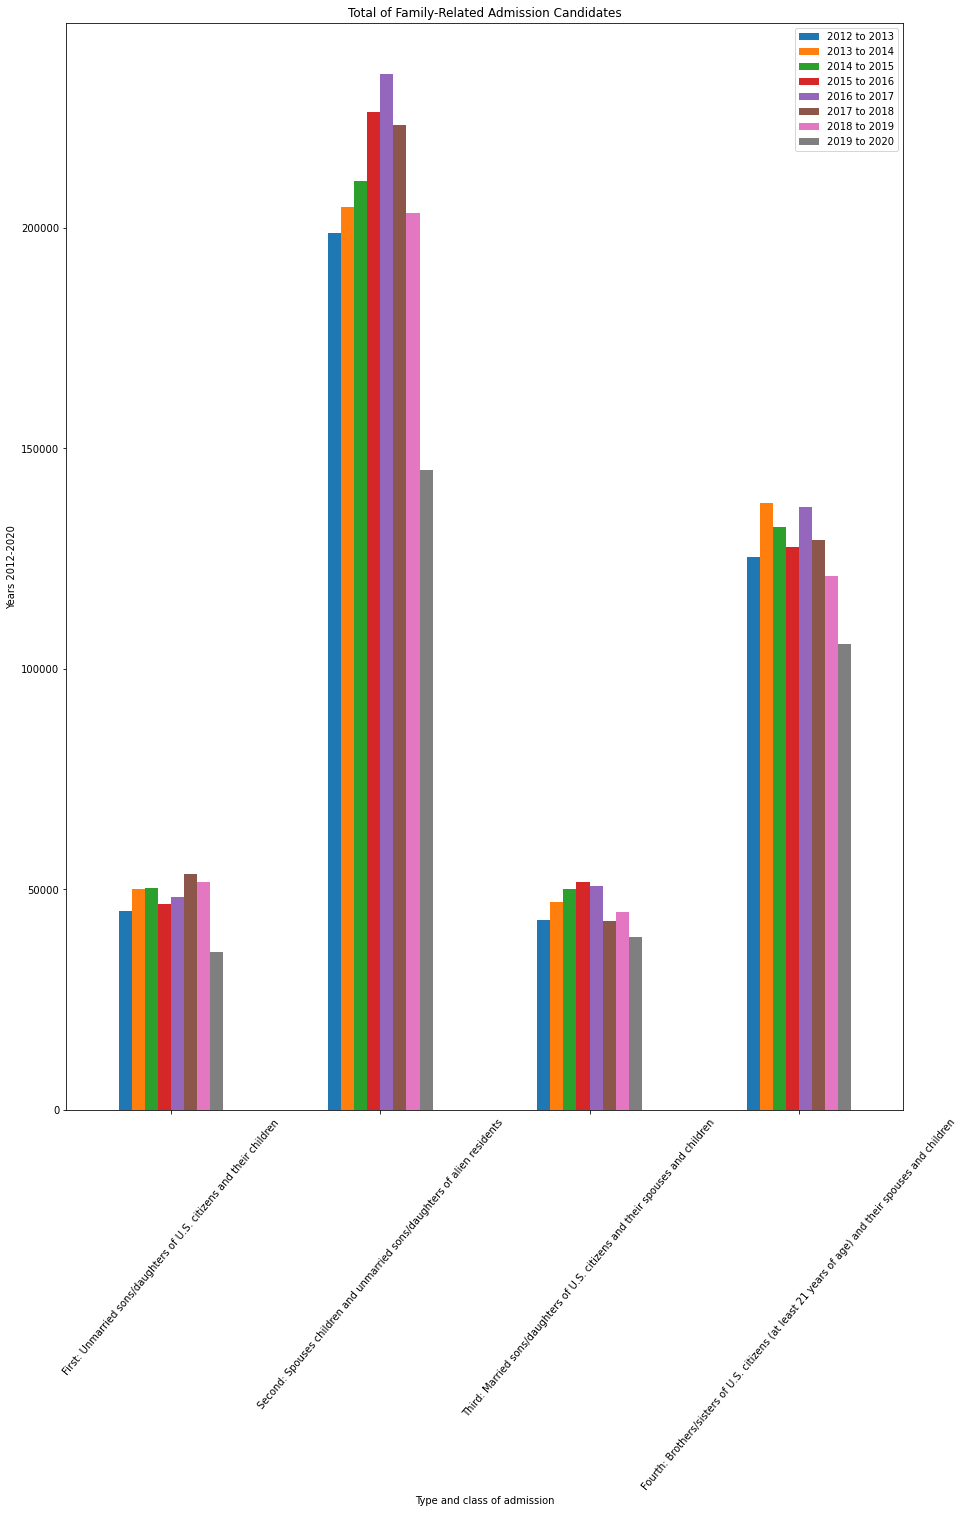

In [28]:
#Total of fam-realted of addmission
diff_df = pd.DataFrame()
for start, end in zip(table.columns[1:10], table.columns[2:]):
     diff_df[f"{start} to {end}"] = table[start].astype(float).add(table[end].astype(float), axis = 0)

        df3 = pd.concat([diff_df.iloc[6:10, :]]);

df3.plot.bar(title="Total of Family-Related Admission Candidates", ylabel="Years 2012-2020", 
            figsize=(15, 20), rot=50);

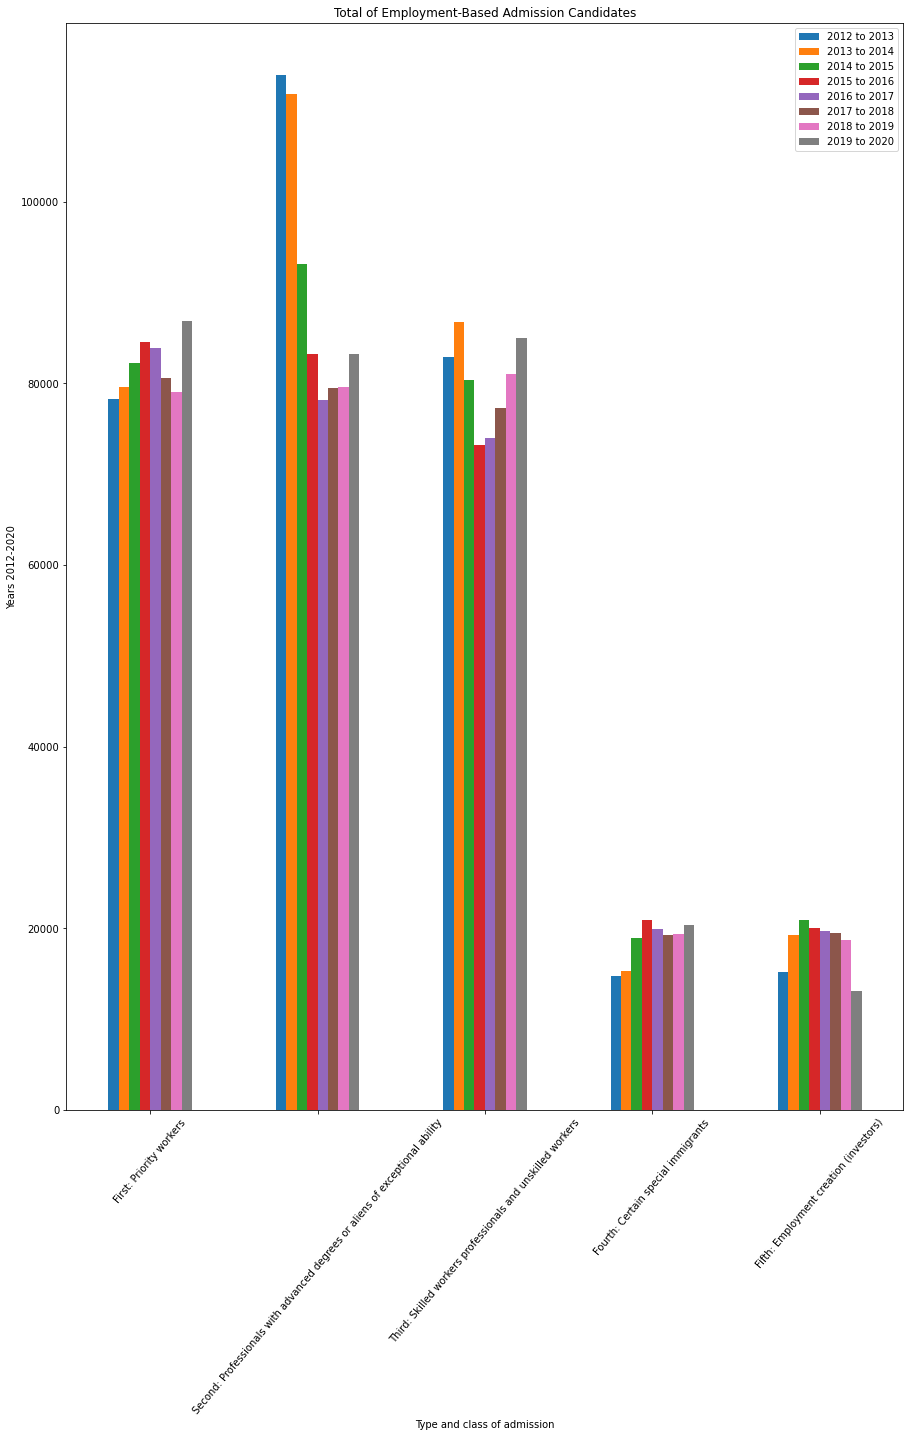

In [29]:
#Total of career-realted of addmission

        
df4 = pd.concat([diff_df.iloc[11:16, :]]);

df4.plot.bar(title="Total of Employment-Based Admission Candidates", ylabel="Years 2012-2020", 
            figsize=(15, 20), rot=50);


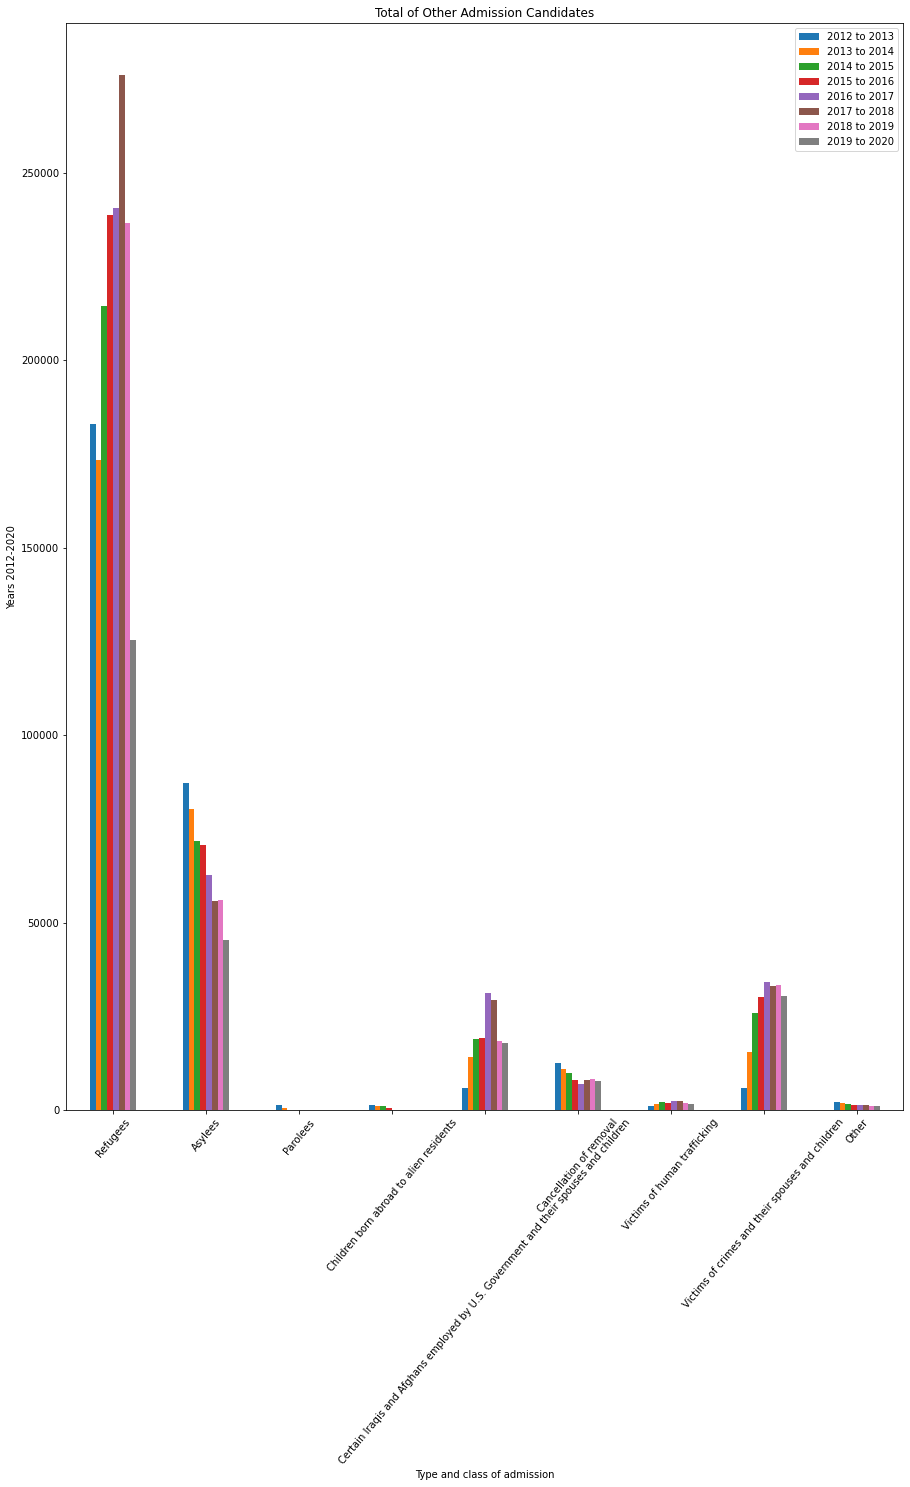

In [30]:
#diff_df = pd.DataFrame()
df5 = pd.concat([diff_df.iloc[17:26, :]]);

df5.plot.bar(title="Total of Other Admission Candidates", ylabel="Years 2012-2020", 
            figsize=(15, 20), rot=50);